In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import functions.eddy_feedback as ef 
import functions.plotting as plot
import functions.data_wrangling as data
import functions.aos_functions as aos

In [3]:
ds2 = xr.open_mfdataset(
    '/home/links/ct715/data_storage/reanalysis/srip_datasets/TEM_jra55_original.nc',
    parallel=True
)
ds2

<xarray.Dataset>
Dimensions:         (time: 708, pressure: 22, latitude: 73)
Coordinates:
  * time            (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T...
  * pressure        (pressure) float32 1e+03 925.0 850.0 700.0 ... 3.0 2.0 1.0
  * latitude        (latitude) float32 -90.0 -87.5 -85.0 ... 85.0 87.5 90.0
Data variables: (12/37)
    EPF_p_qg        (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_phi_qg      (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_p_qg       (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_phi_qg     (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_p_pr        (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_phi_pr      (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    ...              ...
    EPFD_p_qg_k3    (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_phi_qg_k3  (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_p_pr_k3     (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPF_phi_pr_k3   (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_p_pr_k3    (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    EPFD_phi_pr_k3  (time, pressure, latitude) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
Attributes:
    Title:                     Transformed Eulerian Mean (TEM) diagnostics / ...
    Description:               EP flux and other terms from the TEM equations...
    Reanalysis:                jra_55
    Project_Homepage:          http://s-rip.ees.hokudai.ac.jp/
    SPARC_Homepage:            http://www.sparc-climate.org/
    Author:                    Patrick Martineau
    Report_issues_with_data:   patrick.martineau2@mail.mcgill.ca
    Creation_Date:             15-Oct-2017 09:41:14
    history:                   Sun Oct 15 09:41:14 2017: ncra /data/A/SRIP_da...
    nco_openmp_thread_number:  1

In [4]:
# ds2 = ds2[['EPF_p_pr', 'EPF_phi_pr', 'EPFD_p_pr', 'EPFD_phi_pr']]
# ds2 = ds2.rename({
#     'EPF_p_pr': 'epfz', 'EPF_phi_pr': 'epfy',
#     'EPFD_p_pr': 'divFz', 'EPFD_phi_pr': 'divFy'
# })
# ds1 = xr.open_mfdataset(
#     '/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM_ubar_div1.nc',
#     parallel=True
# )
# ds2['ubar'] = ds1.ubar
# ds2.to_netcdf('/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM-pr_EPF_EPFD_ubar.nc')

In [5]:
ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM-pr_EPF_EPFD_ubar.nc',
    parallel=True
)

# take DJF season and subset to NH
ds = data.data_checker1000(ds)
ds = ds.sel(lat=slice(0,90))
ds = data.seasonal_mean(ds, season='djf', cut_ends=True)
ds

<xarray.Dataset>
Dimensions:  (time: 58, level: 22, lat: 37)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 0.0 2.5 5.0 7.5 10.0 ... 80.0 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 1958-12-01 1959-12-01 ... 2015-12-01
Data variables:
    epfz     (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    epfy     (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    divFz    (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    divFy    (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(58, 22, 37), meta=np.ndarray>
Attributes:
    Title:                     Transformed Eulerian Mean (TEM) diagnostics / ...
    Description:               EP flux and other terms from the TEM equations...
    Reanalysis:                jra_55
    Project_Homepage:          http://s-rip.ees.hokudai.ac.jp/
    SPARC_Homepage:            http://www.sparc-climate.org/
    Author:                    Patrick Martineau
    Report_issues_with_data:   patrick.martineau2@mail.mcgill.ca
    Creation_Date:             15-Oct-2017 09:41:14
    history:                   Sun Oct 15 09:41:14 2017: ncra /data/A/SRIP_da...
    nco_openmp_thread_number:  1

### Plot ubar and divFy

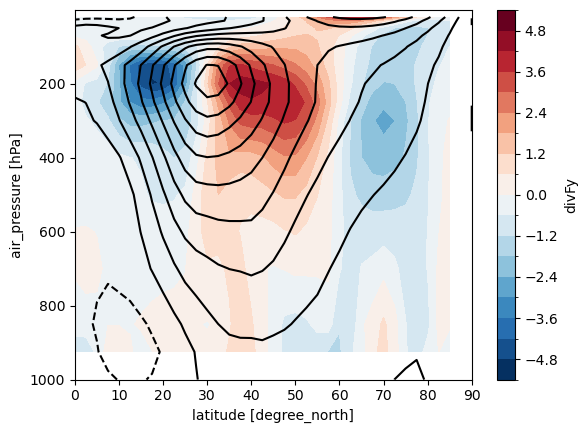

In [6]:
ds = ds.where(ds.level > 10.)

ds['divFy'] = ds['divFy'] * 86400

ds.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
ds.divFy.mean('time').plot.contourf(levels=20, yincrease=False)

### Plot ubar and divFz

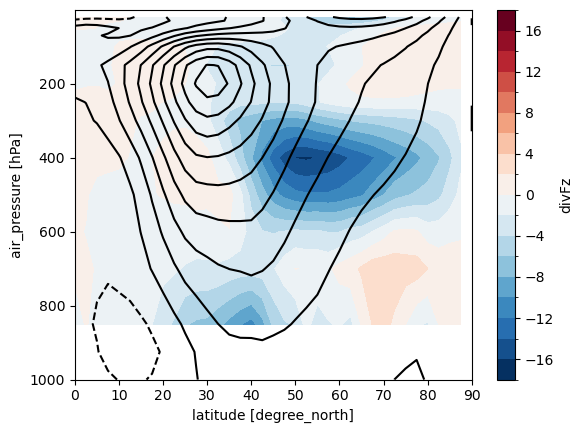

In [7]:
ds = ds.where(ds.level > 10.)

ds['divFz'] = ds['divFz'] * 86400

ds.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
ds.divFz.mean('time').plot.contourf(levels=20, yincrease=False)

### Plot ubar and total divF

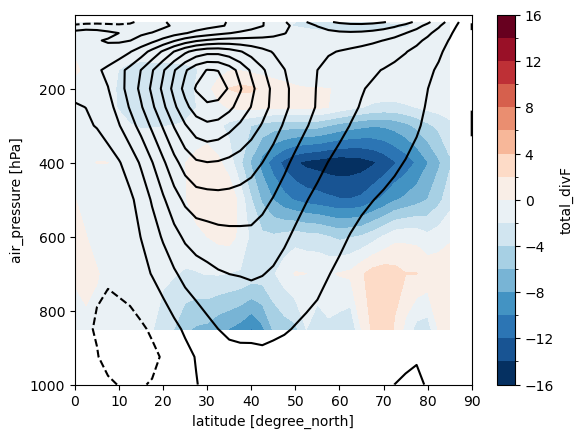

In [8]:
ds = ds.where(ds.level > 10.)
ds['total_divF'] = ds.divFy + ds.divFz

ds.ubar.mean('time').plot.contour(levels=20, yincrease=False, colors='k')
ds.total_divF.mean('time').plot.contourf(levels=20, yincrease=False)

### Plot EP flux arrows

In [9]:
ds = xr.open_mfdataset(
    '/home/links/ct715/data_storage/reanalysis/srip_datasets/JRA55_TEM-pr_EPF_EPFD_ubar.nc',
    parallel=True
)

# take DJF season and subset to NH
ds = data.data_checker1000(ds)
# ds = ds.sel(lat=slice(0,90))
# ds = data.seasonal_mean(ds, season='djf', cut_ends=True)
ds

<xarray.Dataset>
Dimensions:  (time: 708, level: 22, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    epfz     (time, level, lat) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    epfy     (time, level, lat) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    divFz    (time, level, lat) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    divFy    (time, level, lat) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
    ubar     (time, level, lat) float32 dask.array<chunksize=(708, 22, 73), meta=np.ndarray>
Attributes:
    Title:                     Transformed Eulerian Mean (TEM) diagnostics / ...
    Description:               EP flux and other terms from the TEM equations...
    Reanalysis:                jra_55
    Project_Homepage:          http://s-rip.ees.hokudai.ac.jp/
    SPARC_Homepage:            http://www.sparc-climate.org/
    Author:                    Patrick Martineau
    Report_issues_with_data:   patrick.martineau2@mail.mcgill.ca
    Creation_Date:             15-Oct-2017 09:41:14
    history:                   Sun Oct 15 09:41:14 2017: ncra /data/A/SRIP_da...
    nco_openmp_thread_number:  1

In [10]:
# Plot zonal-mean zonal wind with EP flux arrows
def plot_ubar_epflux(ds, label='Meridional plane zonal wind and EP flux', figsize=(9,5),
                     latitude=None, top_atmos=0., orientation='horizontal', location='bottom',
                     extend='both', shrink=0.5, levels=21, skip_lat=1, skip_pres=1, yscale='linear',
                     round_sf=None, savefig=False, fig_label=None, season=None, plot_arrows=True):

    """
    Input: Xarray DataSet containing ubar and epfluxes
            - dims: (time, level, lat)
    
    Output: Plot showing zonal-mean zonal wind
            and EP flux arrows
    """

    ## CONDITIONS

    # If required, check dimensions and variables are labelled correctly
    correct_dims = all(dim_name in ds.dims for dim_name in ['time', 'level', 'lat', 'lon'])
    if not correct_dims:
        ds = data.check_dimensions(ds)

    if season is not None:
        ds = data.seasonal_mean(ds, season=season)

    ## default is both hemispheres
    if latitude == 'NH':
        ds = ds.where( ds.lat >= 0., drop=True )
        orientation='vertical'
        location='right'
        shrink=0.8
    elif latitude == 'SH':
        ds = ds.where( ds.lat <= 0., drop=True )
        orientation='vertical'
        location='right'
        shrink=0.8

    # exclude stratosphere-ish
    ds = ds.where( ds.level >= top_atmos, drop=True )

    #-------------------------------------------------------------------

    ## PRE-PLOTTING STUFF

    # define ubar
    if 'ubar' not in ds.data_vars:
        ubar = ds.u.mean(('time', 'lon'))
    else:
        ubar = ds.ubar.mean('time')

    # calculate mean absolute value of max and min
    max_value = np.nanmax(ubar.values)
    value = round(max_value, round_sf)


    # set linspace levels
    lvl = np.linspace(-value, value, levels)
    ticks = [-value, -value/2, 0, value/2, value]


    # skip variables
    # skip = dict( lat=slice(None, None, skip_lat), level=slice(None, None, skip_pres) )
    skip = {'lat':slice(None, None, skip_lat), 'level':slice(None, None, skip_pres)}

    # set variables
    # lat = ds.lat.isel(dict(lat=slice(None, None, skip_lat)))
    # p = ds.level.isel(dict(level=slice(None, None, skip_pres)))
    lat = ds.lat.isel( {'lat':slice(None, None, skip_lat)} )
    p = ds.level.isel( {'level':slice(None, None, skip_pres)} )


    #-------------------------------------------------------------------

    ## PLOTTING TIME

    # Set figure
    fig, ax = plt.subplots(figsize=figsize)

    plt.contourf(ds.lat.values, ds.level.values, ubar,
              cmap='coolwarm', levels=lvl, extend=extend)
    plt.colorbar(location=location, orientation=orientation, shrink=shrink,
             label='Wind speed (m/s)', extend=extend, ticks=ticks)

    if plot_arrows:
        Fphi = ds.epfy.mean(('time')).isel(skip)
        Fp = ds.epfz.mean(('time')).isel(skip)
        aos.PlotEPfluxArrows(lat, p, Fphi, Fp*0,
                     fig, ax, pivot='mid', yscale=yscale)
    else:
        plt.gca().invert_yaxis()
        plt.yscale(yscale)

    plt.title(f'{label}')
    plt.xlabel('Latitude ($^\\circ$N)')

    # set whether log or linear scale
    if yscale=='log':
        plt.ylabel('Log pressure (hPa)')
    else:
        plt.ylabel('Pressure (hPa)')

    # save figure if required
    if savefig:
        plt.savefig(f'./plots/{fig_label}.png')

    plt.show()

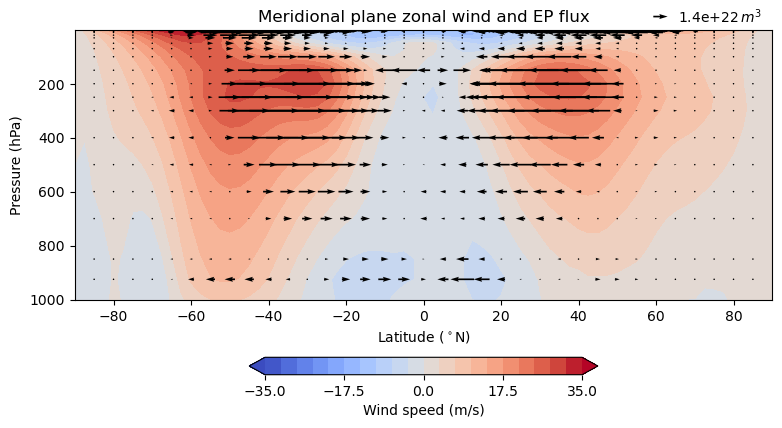

In [11]:
plot_ubar_epflux(ds, top_atmos=0., skip_lat=2)

In [12]:
ds.epfz.units

'm2 s-2 Pa'

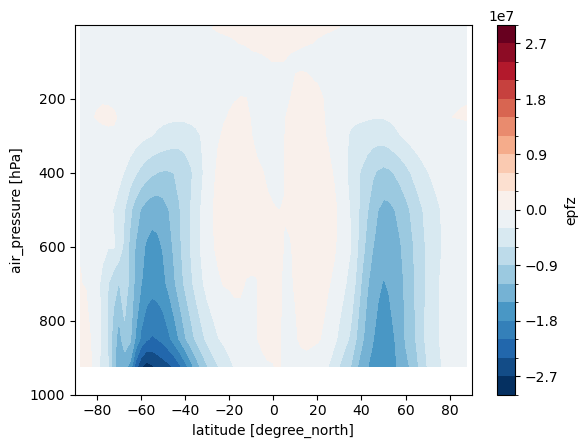

In [13]:
ds.epfz.mean('time').plot.contourf(levels=20, yincrease=False)

In [14]:
ds.epfy

<xarray.DataArray 'epfy' (time: 708, level: 22, lat: 73)>
dask.array<open_dataset-epfy, shape=(708, 22, 73), dtype=float32, chunksize=(708, 22, 73), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1958-01-14T09:00:00 ... 2016-12-14T09:00:00
  * level    (level) float32 1e+03 925.0 850.0 700.0 600.0 ... 5.0 3.0 2.0 1.0
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Attributes:
    standard_name:  northward_eliassen_palm_flux_in_air
    units:          m3 s-2
    description:    Uses primitive equation
    wavenumber:     
    cell_methods:   time: mean

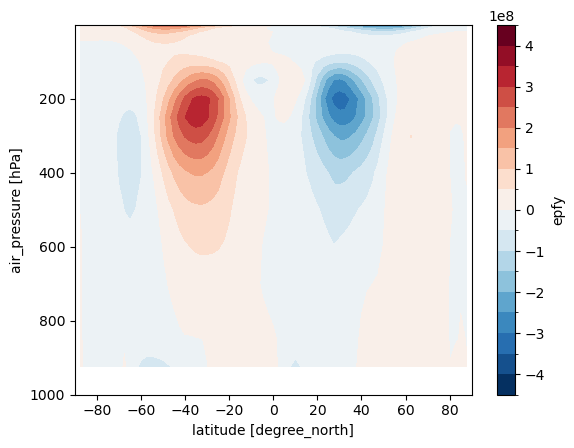

In [15]:
ds.epfy.mean('time').plot.contourf(levels=20, yincrease=False)